In [137]:
import torch
import torchaudio as ta
import matplotlib.pyplot as plt
import cv2
import numpy as np
wav = ta.load('f1.wav')
img = cv2.imread('flagw.png')[:,:,0]/512+1
window  = 2000
dw = window // img.shape[0]//2
w  = wav[0][0]
lr = []
lc = []
for i in range(0,len(w)//window):
    l = img[:,i*2]
    hc =torch.tensor([[x]*dw for x in l])
    hc= hc.flatten()
    fftw = torch.fft.fft(w[i*window : (i+1)*window])[:window//2] *hc
    lr.append(torch.fft.irfft(fftw))
    lc.append(w[i*window : (i+1)*window])
# img w
wavx = torch.concat(lr)
wavy = torch.concat(lc)
wavx = wavx/wavx.max()
# wavx = torch.tensor([wavx.tolist(),wavy.tolist()])

wavf = torch.concat([wavx,wavy])
# wavx.tolist()
wavf = wavf.reshape(2,-1)
ta.save('flag3.wav',wavf,wav[1])

# 解题


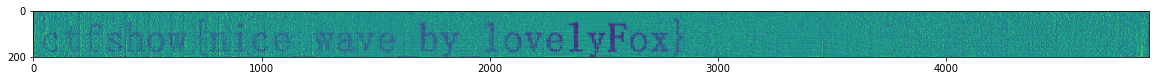

In [3]:
import torch ,torchaudio as ta 
import matplotlib.pyplot as plt,math
wavf = ta.load('flag3.wav')[0]
specgram =  ta.transforms.Spectrogram()(wavf)
img = (specgram.log2()[0,:,:] - specgram.log2()[1,:,:])
plt.figure(figsize=(20,3))
plt.imshow(torch.tanh(img).numpy())

